In [1]:
# Import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
data = pd.read_csv('./data/hotel_revenue_edited.csv')
print(data.shape)
data.head()

(141497, 28)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,82.0,0,1,Canceled
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15,0,Transient,105.5,0,0,Canceled
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,123.0,0,0,Canceled
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,107.0,0,2,Canceled
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,No Agent,0,Transient,108.3,0,2,Canceled


### 1. Which hotel did made more revenue?

In [3]:
gh = data.groupby('hotel')
data1 = gh['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'}) 

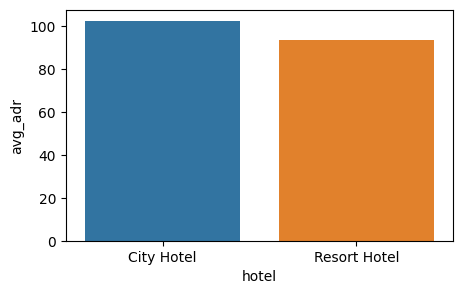

In [4]:
plt.figure(figsize = (5,3))
sns.barplot(x = data1['hotel'], y = data1['avg_adr'] )
plt.show();

### 2. Which months guests were high?

Text(0, 0.5, 'Number of guests')

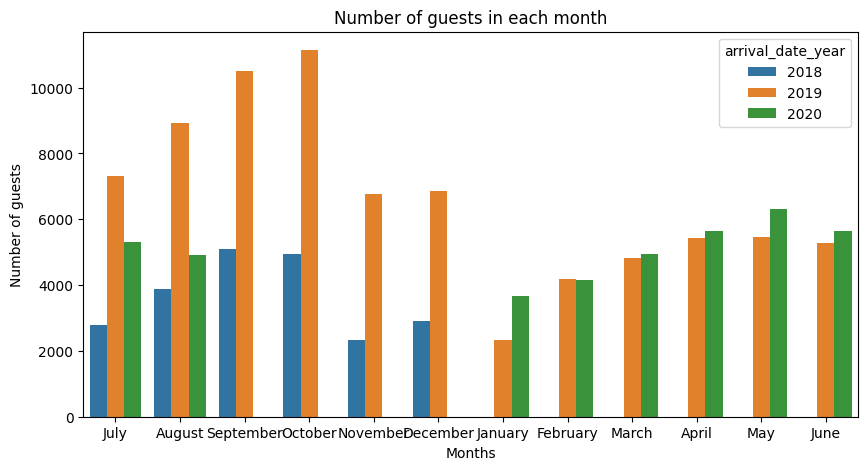

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='arrival_date_month',hue='arrival_date_year')
plt.title('Number of guests in each month')
plt.xlabel('Months')
plt.ylabel('Number of guests')

### 3. Which countries did most the guests come from?

In [6]:
data2 = pd.read_csv('./data/country.csv')
data3 = pd.merge(data, data2, on='country')

In [7]:
data_country = data3[data3['is_canceled']==0][['country','country name']].value_counts().reset_index()

In [8]:
data_country.columns = ['Country', 'Country Name', 'Number of Guests']
data_country

,Country,Country Name,Number of Guests
0,PRT,Portugal,27196
1,GBR,United Kingdom,10896
2,FRA,France,9775
3,ESP,Spain,8185
4,DEU,Germany,6579
...,...,...,...
159,KIR,Kiribati,1
160,FRO,Faroe Islands,1
161,NAM,Namibia,1
162,SLE,Sierra Leone,1


### 4. Which was the best market segment?

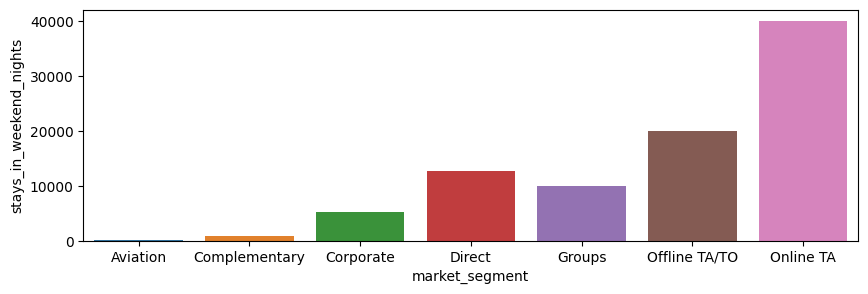

In [9]:
plt.figure(figsize=(10,3))
sns.barplot(x=data[data['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y=data[data['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count());

The Online TA(Travel Agents) are the best market segment of hotel booking.

### 5. Which was the most common channel for hotel booking?

In [10]:
dc = data.groupby(['distribution_channel', 'hotel'])
d1 = pd.DataFrame(round((dc['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr' :'avg_adr'})

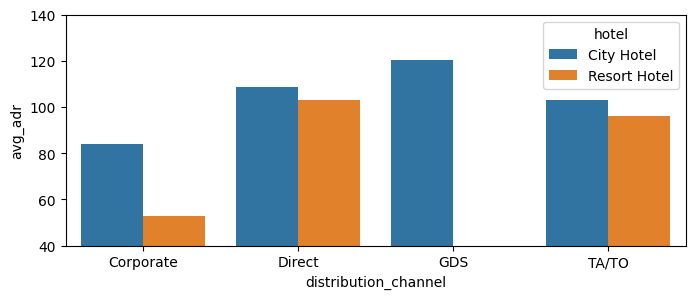

In [11]:
plt.figure(figsize=(8,3))
sns.barplot(x = d1['distribution_channel'], y = d1['avg_adr'], hue = d1['hotel'])
plt.ylim(40,140)
plt.show();